Example from: https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

Let's first load the required dataset you will use.

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

Exploring Data

After you have loaded the dataset, you might want to know a little bit more about it. You can check feature and target names.

In [3]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Split the dataset by using the function train_test_split(). you need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [14]:
# Import train_test_split function
from sklearn.model_selection import train_test_split,GridSearchCV

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

Generating Model

Let's build support vector machine model. First, import the SVM module and create support vector classifier object by passing argument kernel as the linear kernel in SVC() function.

Then, fit your model on train set using fit() and perform prediction on the test set using predict().

In [24]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



Evaluating the Model

Let's estimate how accurately the classifier or model can predict the breast cancer of patients.

Accuracy can be computed by comparing actual test set values and predicted values.

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


Well, you got a classification rate of 96.49%, considered as very good accuracy.

For further evaluation, you can also check precision and recall of model.

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


# MODELS

In [98]:
#Find the dimensions of Data set
cancer.data.shape

(569, 30)

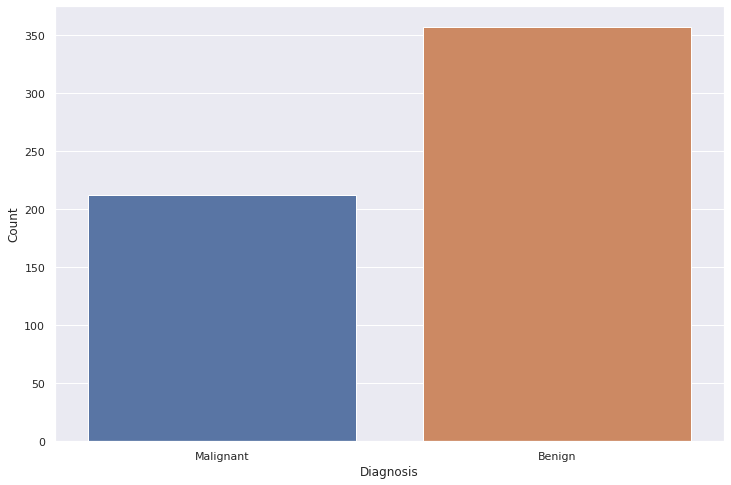

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(12, 8))

# Plot the distribution of the target variable
sns.countplot(x=cancer.target)
sns.set(rc={'figure.figsize':(4,5)})
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

Since our data is imbalanced, we use stratified k-fold cross validation to split our target classes with equal proportion.

In [38]:
from sklearn.model_selection import StratifiedKFold
#K-fold cross validation
cv = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)

# SVM using KFold and Grid search cv

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# parameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['linear', 'rbf']} 

#Finding best parameters 
SVM_GS = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=cv)
  
# Train the model with the best parameters
SVM_GS.fit(X_train, y_train)

y_pred_svm=SVM_GS.predict(X_test)


print(classification_report(y_test, y_pred_svm))

In [49]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy for grid search svm
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
# Model Precision for grid search svm
print("Precision:",metrics.precision_score(y_test, y_pred_svm))

# Model Recall for grid search svm
print("Recall:",metrics.recall_score(y_test, y_pred_svm))

Accuracy: 0.9649122807017544
Precision: 0.9811320754716981
Recall: 0.9629629629629629


# Random Forest using KFold and Grid search cv

In [68]:
from sklearn.ensemble import RandomForestClassifier


param_grid = {'n_estimators': [5, 10, 15, 20],
              'max_features': [2,4,5,8,10]
             }


# Instantiate the grid-search
rf_GS= GridSearchCV(RandomForestClassifier(), param_grid, cv=cv, 
                 scoring = 'accuracy')

# run the grid search on training set
rf_GS.fit(X_train, y_train)

rf_pred = rf_GS.predict(X_test)


In [69]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, rf_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, rf_pred))


Accuracy: 0.9883040935672515
Precision: 0.9818181818181818
Recall: 1.0


# Logistic Regression using KFold and Grid search cv

In [71]:
from sklearn.linear_model import LogisticRegression

parameters = {
    'penalty' : ['l1','l2'],"C":np.logspace(-3,3,7)
}

lr= GridSearchCV( LogisticRegression(),            
                   param_grid = parameters, 
                   scoring='accuracy',       
                   cv=cv)    


# run the grid search on training set
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)


In [72]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, lr_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, lr_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, lr_pred))


Accuracy: 0.9532163742690059
Precision: 0.9629629629629629
Recall: 0.9629629629629629


In [82]:
import pandas as pd
DF=pd.DataFrame(columns=['Model' ,'Accuracy','Precision','recall'])

DF['Model']=['SVM','RandomForest', 'LogisticRegression']
DF['Accuracy']=[metrics.accuracy_score(y_test, y_pred_svm),
                metrics.accuracy_score(y_test, rf_pred),
                metrics.accuracy_score(y_test, lr_pred)]
DF['Precision']=[metrics.precision_score(y_test, y_pred_svm),
                 metrics.precision_score(y_test, rf_pred),
                 metrics.precision_score(y_test, lr_pred)]
DF['recall']=[metrics.recall_score(y_test, y_pred_svm),
              metrics.recall_score(y_test, rf_pred),
              metrics.recall_score(y_test, lr_pred)]

In [84]:
DF

,Model,Accuracy,Precision,recall
0,SVM,0.964912,0.981132,0.962963
1,RandomForest,0.988304,0.981818,1.000000
2,LogisticRegression,0.953216,0.962963,0.962963
